# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
#in dataset both columns have values in multiples of 10k

Reading Dataset

In [13]:
df=pd.read_csv('/content/Data1.txt')
df.columns=['Population', 'Profit']
df.describe()

,Population,Profit
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


Scatter plot of population vs profit

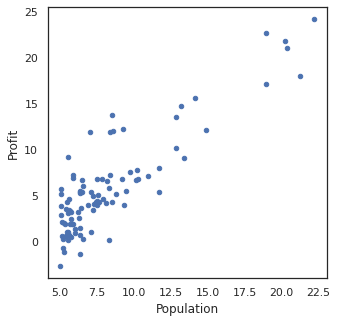

In [17]:
df.plot(kind = "scatter" , x = "Population" , y = "Profit" , figsize = (5,5))

Function to compute the cost function

In [15]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

Appending 1s to the front of the dataset

In [18]:
df.insert(0,"ones",1)
df.head()

,ones,Population,Profit
0,1,5.5277,9.1302
1,1,8.5186,13.6620
2,1,7.0032,11.8540
3,1,5.8598,6.8233
4,1,8.3829,11.8860


Set training data (X) and target variable (y)

In [22]:
cols=df.shape[1]
x=df.iloc[:,0:cols-1]
y=df.iloc[:,cols-1:cols]

In [23]:
print(x.head())
print("---"*20)
print(y.head())

   ones  Population
0     1      5.5277
1     1      8.5186
2     1      7.0032
3     1      5.8598
4     1      8.3829
------------------------------------------------------------
    Profit
0   9.1302
1  13.6620
2  11.8540
3   6.8233
4  11.8860


Converting Dataframe to Numpy matrices and creating a parameter(theta) matrix

In [65]:
x_mat=df[df.columns[1:]].to_numpy()
y_mat=df[df.columns[2:]].to_numpy()
theta=np.matrix(np.array([0,0]))

In [67]:
print(computeCost(x_mat, y_mat, theta))

30.79495785534583


### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [68]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
      error=(x*theta.T)-y
      for j in range(parameters):
        term=np.multiply(error,x[:,j])
        temp[0,j]=theta[0,j]-((alpha/len(x))*np.sum(term))
      theta=temp
      cost[i]=computeCost(x,y,theta)
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)

        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        
        
    return theta, cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [74]:
alpha=0.01
iters=1000
theta, cost = gradientDescent(x_mat, y_mat, theta, alpha, iters)

ValueError: ignored




### Using Matplotlib library to visualize our solution using scatter plot

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

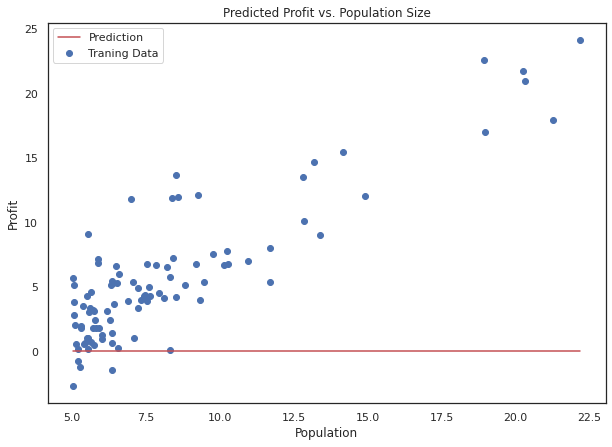

In [71]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(df.Population.min(), df.Population.max(), 100)  
f = theta[0, 0] + (theta[0, 1] * x)
print(f)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.Population, df.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs Training epoch')

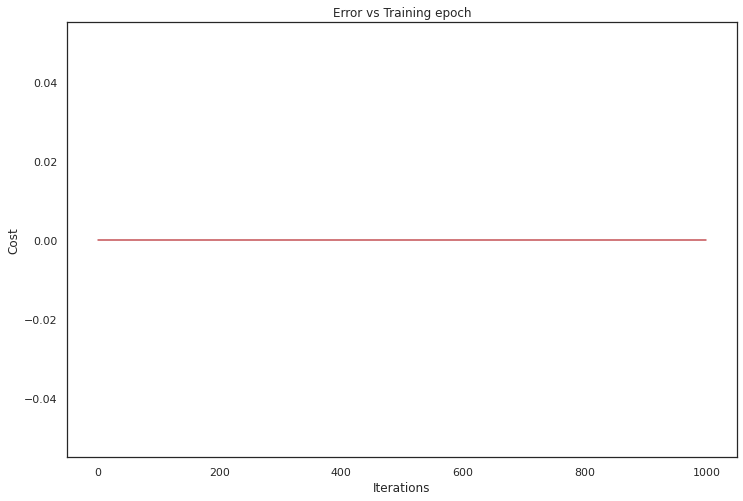

In [72]:
iters=1000
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')